In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

# **Datasets Reading** 

In [2]:
# x_train = pd.read_csv('Datasets/X_Train With Yeo Johnson 70-30.csv')

# x_test = pd.read_csv('Datasets/X_Test With Yeo Johnson 70-30.csv')

# y_train = pd.read_csv('Datasets/Y_Train With Yeo Johnson 70-30.csv')

# y_test = pd.read_csv('Datasets/Y_Test With Yeo Johnson 70-30.csv')

In [3]:
x_train = pd.read_csv('../Updated Datasets/Update X_Train With Yeo Johnson 80-20.csv')

x_test = pd.read_csv('../Updated Datasets/Update X_Test With Yeo Johnson 80-20.csv')

y_train = pd.read_csv('../Updated Datasets/Update Y_Train With Yeo Johnson 80-20.csv')

y_test = pd.read_csv('../Updated Datasets/Update Y_Test With Yeo Johnson 80-20.csv')

In [4]:
x_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.913664,-0.150582,-0.981792,0.341858,-0.229612,-0.809727,0.534238,1.509378,-1.591336,-0.824577,-0.484974
1,0.913664,0.783528,0.183564,-0.031784,0.407443,-0.809727,1.793247,-0.681912,0.022661,0.008711,0.729984
2,-1.094494,-0.789545,-1.733109,-0.767442,-0.802594,-1.337042,-1.076857,-0.037930,-1.223476,0.877448,-1.288259
3,-1.094494,0.458721,2.146976,2.152073,-0.088168,-0.223456,0.880348,-2.801192,0.226574,0.746810,0.383017
4,0.913664,-0.876228,0.452568,-0.066956,-0.278232,0.093852,1.851639,-0.681912,-0.866209,1.614820,-1.288259
...,...,...,...,...,...,...,...,...,...,...,...
206,-1.094494,-0.053378,0.582251,0.653076,-1.329668,-0.062941,-0.910703,1.365324,1.501711,0.597015,-1.007826
207,-1.094494,-0.613164,-0.415121,-1.443545,-1.148477,0.543163,-0.061015,-0.681912,1.069106,0.008711,-0.244194
208,0.913664,0.783528,2.146976,2.160081,0.933351,1.445078,0.880348,-0.037930,1.669644,0.746810,1.185392
209,-1.094494,0.458721,0.670368,1.530827,0.214670,-0.470402,0.451731,-0.343819,-0.520904,0.229703,1.185392


In [5]:
print(y_train['Class'].value_counts())

2    108
0     71
1     32
Name: Class, dtype: int64


# Forward Feature Selection
## Sequential Feature Selection using Logistic Regression

In [6]:
# #importing the necessary libraries
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.linear_model import LogisticRegression
# # Sequential Forward Selection(sfs)
# sfs = SFS(LogisticRegression(),
#           k_features=9,
#           forward=True,
#           floating=False,
#           scoring = 'r2',
#           cv = 0)

# sfs.fit(x_train, y_train)
# sfs.k_feature_names_     # to get the final set of features

In [7]:
SFS_Top_4_X = x_train[['AGE', 'Urea', 'Cr', 'HbA1c']]
SFS_Top_5_X = x_train[['AGE', 'Urea', 'Cr', 'HbA1c', 'TG']]
SFS_Top_7_X = x_train[['AGE', 'Urea', 'Cr', 'HbA1c', 'TG', 'HDL', 'LDL']]
SFS_Top_9_X = x_train[['AGE', 'Urea', 'Cr', 'HbA1c', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']]
x_train = SFS_Top_4_X

In [8]:
SFS_Top_4_X = x_test[['AGE', 'Urea', 'Cr', 'HbA1c']]
SFS_Top_5_X = x_test[['AGE', 'Urea', 'Cr', 'HbA1c', 'TG']]
SFS_Top_7_X = x_test[['AGE', 'Urea', 'Cr', 'HbA1c', 'TG', 'HDL', 'LDL']]
SFS_Top_9_X = x_test[['AGE', 'Urea', 'Cr', 'HbA1c', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']]
x_test = SFS_Top_4_X

In [9]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics

In [10]:
metrics_grid = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict_grid = {}
performance_dict_grid['Metrics'] = metrics_grid

# SMOTETomek Balancing

In [11]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_train)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_train_smt, y_train_smt = smtt.fit_resample(x_train, y_train)
# counter = Counter(y_train_smt)
# print('After', counter)


In [12]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_test)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_test_smt, y_test_smt = smtt.fit_resample(x_test, y_test)
# counter = Counter(y_test_smt)
# print('After', counter)


# Support Vector Classifier Train, Test 

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train, y_train)
#modelSVC.fit(x_test, y_test)
#print(modelSVC.score(x_test, y_test))

y_pred_svc = modelSVC.predict(x_test)
#y_pred = modelSVC.predict(x_train)
svc_acc = accuracy_score(y_test, y_pred_svc)
#ac = accuracy_score(y_train, y_pred)
print(svc_acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.9622641509433962
[[24  1  0]
 [ 0  7  1]
 [ 0  0 20]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.88      0.88      0.88         8
           2       0.95      1.00      0.98        20

    accuracy                           0.96        53
   macro avg       0.94      0.94      0.94        53
weighted avg       0.96      0.96      0.96        53



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, modelSVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



Y_pred_svc = modelSVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_svc)
f1 = f1_score(y_test, Y_pred_svc, average = "weighted")
precision = precision_score(y_test, Y_pred_svc, average = "weighted")
recall = recall_score(y_test, Y_pred_svc, average = "weighted")

pred_prob = modelSVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.963162623539982
f1 Score  0.9623017177418597
Recall  0.9622641509433962
Specificity/TNR: 0.96
Cohen Kappa: 0.9385507246376812
AUC Score  0.9921164021164021


In [15]:
svc_performances = [svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict['SVC'] = svc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9622641509433962,
  0.963162623539982,
  0.9622641509433962,
  0.9623017177418597,
  0.9385507246376812,
  0.9921164021164021]}

# Supper Vector Classifier Hyperparameter Tuning GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV
GSCV_SVC = GridSearchCV(modelSVC,{
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf', 'linear', 'poly', 'sigmoid']
}, 
cv = 10, 
return_train_score = False
)
GSCV_SVC.fit(x_train, y_train)
GSCV_SVC.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.04414053, 0.01572707, 0.07126813, 0.01765354, 0.02177427,
        0.02227192, 0.02623272, 0.02492177, 0.02949932, 0.02422998,
        0.02272227, 0.02350791, 0.03001151, 0.01829898, 0.02015705,
        0.02545509, 0.03143494, 0.01772947, 0.01937139, 0.0262574 ,
        0.0281143 , 0.01936717, 0.08320341, 0.01983235, 0.01907926,
        0.01978185, 0.01962323, 0.01875429, 0.02178688, 0.01676321,
        0.01890624, 0.02396321, 0.02982888, 0.01610246, 0.0187731 ,
        0.02405818, 0.0293335 , 0.01827528, 0.02348065, 0.02538857,
        0.02725182, 0.02079546, 0.11805751, 0.02825508, 0.0223135 ,
        0.02223768, 0.02164726, 0.01869628, 0.02509563, 0.02006204,
        0.02326686, 0.02359374, 0.03076591, 0.02032175, 0.02886202,
        0.0373877 , 0.0447865 , 0.01941168, 0.01887283, 0.02507629,
        0.03443136, 0.02803497, 0.139675  , 0.01977835, 0.02008896,
        0.02048173, 0.01919355, 0.01901269, 0.0242979 , 0.02114744,
        0.01976767, 0.02193365,

In [17]:
df_svc_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_svc_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044141,0.009118,0.007101,0.005067,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.954545,0.952381,...,0.904762,0.904762,0.809524,0.857143,0.809524,0.952381,0.761905,0.881169,0.065010,134
1,0.015727,0.002998,0.002761,0.000361,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.909091,0.809524,...,0.952381,1.000000,0.761905,0.904762,0.904762,0.952381,0.857143,0.886147,0.071397,125
2,0.071268,0.021410,0.003073,0.000728,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.818182,0.952381,...,0.714286,0.857143,0.761905,0.761905,0.809524,0.857143,0.666667,0.805628,0.078197,205
3,0.017654,0.001005,0.002989,0.000169,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.636364,0.523810,...,0.809524,0.952381,0.571429,0.666667,0.666667,0.714286,0.571429,0.687446,0.121872,277
4,0.021774,0.002981,0.003317,0.000786,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.909091,0.952381,...,0.904762,0.952381,0.809524,0.809524,0.952381,0.952381,0.809524,0.895671,0.059560,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.023190,0.001839,0.003093,0.000370,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.727273,0.809524,...,0.857143,0.857143,0.714286,0.809524,0.809524,0.809524,0.761905,0.801299,0.049223,207
396,0.029291,0.002744,0.003771,0.000693,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.590909,0.714286,...,0.714286,0.714286,0.619048,0.666667,0.761905,0.761905,0.666667,0.692424,0.053463,275
397,0.034986,0.005167,0.002436,0.000445,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.909091,0.857143,...,0.952381,1.000000,0.809524,0.952381,0.952381,0.952381,0.857143,0.909957,0.058105,50
398,0.018550,0.001695,0.002500,0.000801,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.454545,0.476190,...,0.523810,0.523810,0.523810,0.523810,0.523810,0.523810,0.523810,0.512121,0.023872,306


In [18]:
df_svc_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.881169
1,1,linear,0.886147
2,1,poly,0.805628
3,1,sigmoid,0.687446
4,1,rbf,0.895671
...,...,...,...
395,20,sigmoid,0.801299
396,20,rbf,0.692424
397,20,linear,0.909957
398,20,poly,0.512121


In [19]:
print(GSCV_SVC.best_score_)
gscv_svc_acc = GSCV_SVC.best_score_
print(GSCV_SVC.best_params_)

0.9428571428571428
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [20]:
grid_predictions = GSCV_SVC.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.88      0.88      0.88         8
           2       0.95      1.00      0.98        20

    accuracy                           0.96        53
   macro avg       0.94      0.94      0.94        53
weighted avg       0.96      0.96      0.96        53



In [21]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, GSCV_SVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



y_pred_svc_grid = GSCV_SVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, y_pred_svc_grid)
f1 = f1_score(y_test, y_pred_svc_grid, average = "weighted")
precision = precision_score(y_test, y_pred_svc_grid, average = "weighted")
recall = recall_score(y_test, y_pred_svc_grid, average = "weighted")

pred_prob = GSCV_SVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.963162623539982
f1 Score  0.9623017177418597
Recall  0.9622641509433962
Specificity/TNR: 0.96
Cohen Kappa: 0.9385507246376812
AUC Score  0.9972222222222222


In [22]:
svc_performances_grid = [gscv_svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['SVC'] = svc_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9428571428571428,
  0.963162623539982,
  0.9622641509433962,
  0.9623017177418597,
  0.9385507246376812,
  0.9972222222222222]}

# Logistic Regression Train, Test

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

y_pred_lr = modelLR.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred_lr)

print("Training Accuracy: {:.3f}".format(modelLR.score(x_train, y_train)))
print("Testing Accuracy: {:.3f}".format(modelLR.score(x_test, y_test)))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.877
Testing Accuracy: 0.887
[[24  1  0]
 [ 1  3  4]
 [ 0  0 20]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.75      0.38      0.50         8
           2       0.83      1.00      0.91        20

    accuracy                           0.89        53
   macro avg       0.85      0.78      0.79        53
weighted avg       0.88      0.89      0.87        53



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, modelLR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr = modelLR.predict(x_test)
pred_prob = modelLR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr)
f1 = f1_score(y_test, Y_pred_lr, average = "weighted")
precision = precision_score(y_test, Y_pred_lr, average = "weighted")
recall = recall_score(y_test, Y_pred_lr, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8805031446540882
f1 Score  0.8713550600343053
Recall  0.8867924528301887
Specificity/TNR: 0.96
Cohen Kappa: 0.8098086124401913
AUC Score  0.9601851851851851


In [25]:
rfc_performances = [lr_ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['LR'] = rfc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9622641509433962,
  0.963162623539982,
  0.9622641509433962,
  0.9623017177418597,
  0.9385507246376812,
  0.9921164021164021],
 'LR': [0.8867924528301887,
  0.8805031446540882,
  0.8867924528301887,
  0.8713550600343053,
  0.8098086124401913,
  0.9601851851851851]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [26]:
from sklearn import linear_model

C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = linear_model.LogisticRegression()
GSCV_LR = GridSearchCV(logistic, hyperparameters, cv = 10)
GSCV_LR.fit(x_train, y_train)
GSCV_LR.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.00422342, 0.00965862, 0.00570374, 0.00687706, 0.00582411,
        0.0150353 , 0.0048789 , 0.01502662, 0.00614312, 0.01821113,
        0.00550628, 0.00915756, 0.00512414, 0.01884804, 0.00457902,
        0.00868425, 0.00515733, 0.01841419, 0.00494566, 0.01026602,
        0.00532155, 0.01075559, 0.00444009, 0.00924613, 0.00473831,
        0.01177213, 0.00509565, 0.00945334, 0.00503159, 0.01098766,
        0.00458264, 0.00892677, 0.00505846, 0.0106504 , 0.00466356,
        0.00954018, 0.005159  , 0.01005268, 0.0048034 , 0.00957942]),
 'std_fit_time': array([0.00066108, 0.0015827 , 0.00144816, 0.0010446 , 0.00143693,
        0.0017516 , 0.00161758, 0.00761291, 0.00177233, 0.00217553,
        0.00289277, 0.00312352, 0.00131254, 0.00545898, 0.00107705,
        0.00166158, 0.00095117, 0.00306037, 0.00148055, 0.00124019,
        0.00096174, 0.00117843, 0.00111709, 0.00151078, 0.00125631,
        0.00174097, 0.0006522 , 0.00121608, 0.00090822, 0.00232877,
        0.000

In [27]:
df_lr_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044141,0.009118,0.007101,0.005067,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.954545,0.952381,...,0.904762,0.904762,0.809524,0.857143,0.809524,0.952381,0.761905,0.881169,0.065010,134
1,0.015727,0.002998,0.002761,0.000361,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.909091,0.809524,...,0.952381,1.000000,0.761905,0.904762,0.904762,0.952381,0.857143,0.886147,0.071397,125
2,0.071268,0.021410,0.003073,0.000728,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.818182,0.952381,...,0.714286,0.857143,0.761905,0.761905,0.809524,0.857143,0.666667,0.805628,0.078197,205
3,0.017654,0.001005,0.002989,0.000169,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.636364,0.523810,...,0.809524,0.952381,0.571429,0.666667,0.666667,0.714286,0.571429,0.687446,0.121872,277
4,0.021774,0.002981,0.003317,0.000786,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.909091,0.952381,...,0.904762,0.952381,0.809524,0.809524,0.952381,0.952381,0.809524,0.895671,0.059560,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.023190,0.001839,0.003093,0.000370,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.727273,0.809524,...,0.857143,0.857143,0.714286,0.809524,0.809524,0.809524,0.761905,0.801299,0.049223,207
396,0.029291,0.002744,0.003771,0.000693,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.590909,0.714286,...,0.714286,0.714286,0.619048,0.666667,0.761905,0.761905,0.666667,0.692424,0.053463,275
397,0.034986,0.005167,0.002436,0.000445,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.909091,0.857143,...,0.952381,1.000000,0.809524,0.952381,0.952381,0.952381,0.857143,0.909957,0.058105,50
398,0.018550,0.001695,0.002500,0.000801,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.454545,0.476190,...,0.523810,0.523810,0.523810,0.523810,0.523810,0.523810,0.523810,0.512121,0.023872,306


In [28]:
df_lr_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.881169
1,1,linear,0.886147
2,1,poly,0.805628
3,1,sigmoid,0.687446
4,1,rbf,0.895671
...,...,...,...
395,20,sigmoid,0.801299
396,20,rbf,0.692424
397,20,linear,0.909957
398,20,poly,0.512121


In [29]:
print(GSCV_LR.best_score_)
gscv_lr_acc = GSCV_LR.best_score_
print(GSCV_LR.best_params_)

0.8861471861471862
{'C': 464.15888336127773, 'penalty': 'l1', 'solver': 'saga'}


In [30]:
grid_predictions = GSCV_LR.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.83      0.62      0.71         8
           2       0.87      1.00      0.93        20

    accuracy                           0.92        53
   macro avg       0.90      0.86      0.87        53
weighted avg       0.93      0.92      0.92        53



In [31]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_LR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr_grid = GSCV_LR.predict(x_test)
pred_prob = GSCV_LR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr_grid)
f1 = f1_score(y_test, Y_pred_lr_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_lr_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_lr_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9256220946130708
f1 Score  0.920919486706486
Recall  0.9245283018867925
Specificity/TNR: 0.96
Cohen Kappa: 0.8753674309229865
AUC Score  0.9796296296296297


In [32]:
lr_performances_grid = [gscv_lr_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['LR'] = lr_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9428571428571428,
  0.963162623539982,
  0.9622641509433962,
  0.9623017177418597,
  0.9385507246376812,
  0.9972222222222222],
 'LR': [0.8861471861471862,
  0.9256220946130708,
  0.9245283018867925,
  0.920919486706486,
  0.8753674309229865,
  0.9796296296296297]}

# KNN Train, Test

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


modelKNN = KNeighborsClassifier() #, algorithm = 'ball_tree', weights = 'distance', metric = 'minkowski', p = 2
modelKNN.fit(x_train, y_train)
print(modelKNN.score(x_test, y_test))

# Predicting the Test set results
y_pred_knn = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.8490566037735849
0.8490566037735849
[[20  5  0]
 [ 1  6  1]
 [ 0  1 19]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.50      0.75      0.60         8
           2       0.95      0.95      0.95        20

    accuracy                           0.85        53
   macro avg       0.80      0.83      0.81        53
weighted avg       0.88      0.85      0.86        53



C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [34]:
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test, modelKNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn = modelKNN.predict(x_test)
pred_prob = modelKNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn)
f1 = f1_score(y_test, Y_pred_knn, average = "weighted")
precision = precision_score(y_test, Y_pred_knn, average = "weighted")
recall = recall_score(y_test, Y_pred_knn, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


Precision  0.8831985624438454
f1 Score  0.8592288761279737
Recall  0.8490566037735849
Specificity/TNR: 0.8
Cohen Kappa: 0.7628635346756152
AUC Score  0.9598520923520923


In [35]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9622641509433962,
  0.963162623539982,
  0.9622641509433962,
  0.9623017177418597,
  0.9385507246376812,
  0.9921164021164021],
 'LR': [0.8867924528301887,
  0.8805031446540882,
  0.8867924528301887,
  0.8713550600343053,
  0.8098086124401913,
  0.9601851851851851],
 'KNN': [0.8490566037735849,
  0.8831985624438454,
  0.8490566037735849,
  0.8592288761279737,
  0.7628635346756152,
  0.9598520923520923]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [36]:
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

GSCV_KNN = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
GSCV_KNN.fit(x_train, y_train)
GSCV_KNN.cv_results_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'mean_fit_time': array([0.02674537, 0.01291845, 0.01641748, 0.03862576, 0.04562097,
        0.04306192, 0.02009211, 0.02773666, 0.01763515, 0.01994684,
        0.02016926, 0.01217282, 0.0194263 , 0.01459825, 0.02003503,
        0.01492958, 0.02098029, 0.02072995, 0.02422519, 0.04754734,
        0.01666319, 0.01601071, 0.01235285, 0.01068437, 0.00841341,
        0.01158299, 0.00979972, 0.00925751, 0.02460248, 0.02122765,
        0.01419768, 0.02132778, 0.03166656, 0.02024944, 0.01289647,
        0.00873535, 0.01462915, 0.01184511, 0.01288397, 0.01346045,
        0.01766055, 0.01300974, 0.01354756, 0.00643301, 0.01112368,
        0.01195664, 0.010481  , 0.01414464, 0.01012943, 0.01168537,
        0.01555374, 0.0080363 , 0.01924829, 0.0113379 , 0.01260431,
        0.0112793 , 0.01673572, 0.01515515, 0.01357379, 0.011463  ,
        0.00940793, 0.00892162, 0.0085737 , 0.00788641, 0.00965319,
        0.0097935 , 0.00918796, 0.01282096, 0.00743339, 0.00961163,
        0.01911623, 0.01371713,

In [37]:
df_lr_grid = pd.DataFrame(GSCV_KNN.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026745,0.025229,0.029520,0.035419,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.818182,0.904762,...,0.857143,0.904762,0.857143,0.857143,0.857143,0.904762,0.761905,0.853247,0.044166,103
1,0.012918,0.002935,0.016519,0.022376,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.818182,0.904762,...,0.857143,0.904762,0.857143,0.857143,0.857143,0.904762,0.761905,0.853247,0.044166,103
2,0.016417,0.007801,0.015619,0.011858,minkowski,2,uniform,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.818182,0.809524,...,0.952381,0.904762,0.809524,0.904762,0.857143,0.904762,0.809524,0.872294,0.055649,65
3,0.038626,0.040523,0.031033,0.036508,minkowski,2,distance,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.818182,0.904762,...,0.857143,0.904762,0.857143,0.857143,0.857143,0.904762,0.761905,0.853247,0.044166,103
4,0.045621,0.025144,0.039835,0.017508,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.818182,0.857143,...,0.857143,0.904762,0.857143,0.904762,0.857143,0.857143,0.857143,0.862771,0.023951,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.008590,0.007757,0.005764,0.003687,manhattan,18,distance,"{'metric': 'manhattan', 'n_neighbors': 18, 'we...",0.909091,0.952381,...,1.000000,0.952381,0.904762,0.809524,0.904762,0.952381,0.761905,0.909957,0.068824,7
116,0.010783,0.009289,0.017040,0.020372,manhattan,19,uniform,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.863636,0.904762,...,1.000000,0.904762,0.761905,0.809524,0.904762,0.952381,0.761905,0.881602,0.077343,42
117,0.010448,0.008795,0.009342,0.009500,manhattan,19,distance,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.909091,0.952381,...,1.000000,0.952381,0.857143,0.809524,0.904762,0.952381,0.761905,0.905195,0.070642,14
118,0.009858,0.009636,0.011424,0.012174,manhattan,20,uniform,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.863636,0.904762,...,1.000000,0.904762,0.761905,0.857143,0.904762,0.952381,0.761905,0.891126,0.079576,28


In [38]:
df_lr_grid[['param_metric', 'param_n_neighbors', 'mean_test_score']]

,param_metric,param_n_neighbors,mean_test_score
0,minkowski,1,0.853247
1,minkowski,1,0.853247
2,minkowski,2,0.872294
3,minkowski,2,0.853247
4,minkowski,3,0.862771
...,...,...,...
115,manhattan,18,0.909957
116,manhattan,19,0.881602
117,manhattan,19,0.905195
118,manhattan,20,0.891126


In [39]:
print(GSCV_KNN.best_score_)
gscv_knn_acc = GSCV_KNN.best_score_
print(GSCV_KNN.best_params_)

0.9147186147186147
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [40]:
grid_predictions = GSCV_KNN.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.70      0.88      0.78         8
           2       1.00      0.95      0.97        20

    accuracy                           0.92        53
   macro avg       0.89      0.92      0.90        53
weighted avg       0.94      0.92      0.93        53



In [41]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_KNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn_grid = GSCV_KNN.predict(x_test)
pred_prob = GSCV_KNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn_grid)
f1 = f1_score(y_test, Y_pred_knn_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_knn_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_knn_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.935062893081761
f1 Score  0.9279016880095048
Recall  0.9245283018867925
Specificity/TNR: 0.92
Cohen Kappa: 0.8787878787878788
AUC Score  0.9873809523809524


In [42]:
knn_performances_grid = [gscv_knn_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['KNN'] = knn_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9428571428571428,
  0.963162623539982,
  0.9622641509433962,
  0.9623017177418597,
  0.9385507246376812,
  0.9972222222222222],
 'LR': [0.8861471861471862,
  0.9256220946130708,
  0.9245283018867925,
  0.920919486706486,
  0.8753674309229865,
  0.9796296296296297],
 'KNN': [0.9147186147186147,
  0.935062893081761,
  0.9245283018867925,
  0.9279016880095048,
  0.8787878787878788,
  0.9873809523809524]}

# Result of all classifiers

In [43]:
performance_df = pd.DataFrame.from_dict(performance_dict)
performance_df


,Metrics,SVC,LR,KNN
0,Accuracy,0.962264,0.886792,0.849057
1,Precision,0.963163,0.880503,0.883199
2,Recall,0.962264,0.886792,0.849057
3,F1 Score,0.962302,0.871355,0.859229
4,Cohen Kappa,0.938551,0.809809,0.762864
5,AUC,0.992116,0.960185,0.959852


# Result of all classifiers after hyperparameter tuning 

In [44]:
performance_df_grid = pd.DataFrame.from_dict(performance_dict_grid)
performance_df_grid

,Metrics,SVC,LR,KNN
0,Accuracy,0.942857,0.886147,0.914719
1,Precision,0.963163,0.925622,0.935063
2,Recall,0.962264,0.924528,0.924528
3,F1 Score,0.962302,0.920919,0.927902
4,Cohen Kappa,0.938551,0.875367,0.878788
5,AUC,0.997222,0.979630,0.987381


# Extracting CSV

In [45]:
performance_df = performance_df.transpose()
performance_df.to_csv("../Final CSV With YJ/With Yeo Johnson 80-20 Applying SFS Top 4 features.csv")

performance_df_grid = performance_df_grid.transpose()
performance_df_grid.to_csv("../Final CSV With YJ/With Yeo Johnson 80-20 Applying Hyperparameter SFS Top 4 features.csv")

# ROC Curve

In [46]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test)
pred_prob5 = modelLR.predict_proba(x_test)
pred_prob7 = modelKNN.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

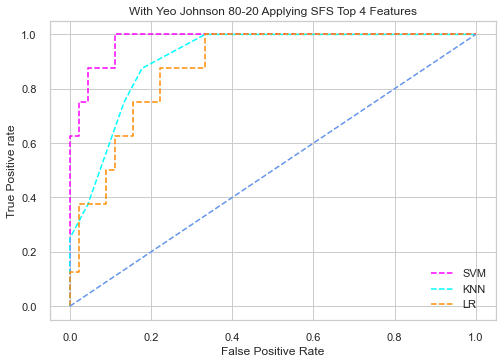

In [47]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sb.set_theme(style = 'whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'magenta', label = 'SVM')
plt.plot(fpr7, tpr7, linestyle = '--', color = 'cyan', label = 'KNN')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'darkorange', label = 'LR')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'cornflowerblue')
# title
plt.title('With Yeo Johnson 80-20 Applying SFS Top 4 Features')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig("../Final ROC With YJ/With Yeo Johnson 80-20 Applying SFS Top 4 Features.png", dpi=300)

plt.show();